In [6]:
# -*- coding:UTF-8 -*-
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [7]:
def load_data(filename):
    dataset, labels = [], []
    with open(filename, 'r') as f:
        for line in f:
            x, y, label = [float(i) for i in line.strip().split()]
            dataset.append([x, y])
            labels.append(label)
    return dataset, labels
def clip(alpha, L, H):
    ''' 修建alpha的值到L和H之间.
    '''
    if alpha < L:
        return L
    elif alpha > H:
        return H
    else:
        return alpha
def select_j(i, m):
    ''' 在m中随机选择除了i之外剩余的数
    '''
    l = list(range(m))
    seq = l[: i] + l[i+1:]
    return np.random.choice(seq)

In [8]:
def simple_smo(dataset, labels, C, max_iter):
    ''' 简化版SMO算法实现，未使用启发式方法对alpha对进行选择.
    :param dataset: 所有特征数据向量
    :param labels: 所有的数据标签
    :param C: 软间隔常数, 0 <= alpha_i <= C
    :param max_iter: 外层循环最大迭代次数
    '''
    dataset = np.array(dataset)
    m, n = dataset.shape
    labels = np.array(labels)
    # 初始化参数
    alphas = np.zeros(m)
    b = 0
    it = 0
    def f(x):
        "SVM分类器函数 y = w^Tx + b"
        # Kernel function vector.
        x = np.matrix(x).T
        data = np.matrix(dataset)
        ks = data*x
        # Predictive value.
        wx = np.matrix(alphas*labels)*ks
        fx = wx + b
        return fx[0, 0]

    while it < max_iter:
        pair_changed = 0
        for i in range(m):
            a_i, x_i, y_i = alphas[i], dataset[i], labels[i]
            fx_i = f(x_i)
            E_i = fx_i - y_i
            j = select_j(i, m)
            a_j, x_j, y_j = alphas[j], dataset[j], labels[j]
            fx_j = f(x_j)
            E_j = fx_j - y_j
            K_ii, K_jj, K_ij = np.dot(x_i, x_i), np.dot(x_j, x_j), np.dot(x_i, x_j)
            eta = K_ii + K_jj - 2*K_ij
            if eta <= 0:
                print('WARNING  eta <= 0')
                continue
            # 获取更新的alpha对
            a_i_old, a_j_old = a_i, a_j
            a_j_new = a_j_old + y_j*(E_i - E_j)/eta
            # 对alpha进行修剪
            if y_i != y_j:
                L = max(0, a_j_old - a_i_old)
                H = min(C, C + a_j_old - a_i_old)
            else:
                L = max(0, a_i_old + a_j_old - C)
                H = min(C, a_j_old + a_i_old)
            a_j_new = clip(a_j_new, L, H)
            a_i_new = a_i_old + y_i*y_j*(a_j_old - a_j_new)
            if abs(a_j_new - a_j_old) < 0.00001:
                #print('WARNING   alpha_j not moving enough')
                continue
            alphas[i], alphas[j] = a_i_new, a_j_new
            # 更新阈值b
            b_i = -E_i - y_i*K_ii*(a_i_new - a_i_old) - y_j*K_ij*(a_j_new - a_j_old) + b
            b_j = -E_j - y_i*K_ij*(a_i_new - a_i_old) - y_j*K_jj*(a_j_new - a_j_old) + b
            if 0 < a_i_new < C:
                b = b_i
            elif 0 < a_j_new < C:
                b = b_j
            else:
                b = (b_i + b_j)/2
            pair_changed += 1
            print('INFO   iteration:{}  i:{}  pair_changed:{}'.format(it, i, pair_changed))
        if pair_changed == 0:
            it += 1
        else:
            it = 0
        print('iteration number: {}'.format(it))
    return alphas, b

In [10]:
def get_w(alphas, dataset, labels):
    ''' 通过已知数据点和拉格朗日乘子获得分割超平面参数w
    '''
    alphas, dataset, labels = np.array(alphas), np.array(dataset), np.array(labels)
    yx = labels.reshape(1, -1).T*np.array([1, 1])*dataset
    w = np.dot(yx.T, alphas)
    return w.tolist()

INFO   iteration:0  i:2  pair_changed:1
INFO   iteration:0  i:4  pair_changed:2
INFO   iteration:0  i:6  pair_changed:3
INFO   iteration:0  i:10  pair_changed:4
INFO   iteration:0  i:17  pair_changed:5
INFO   iteration:0  i:26  pair_changed:6
INFO   iteration:0  i:53  pair_changed:7
iteration number: 0
INFO   iteration:0  i:2  pair_changed:1
INFO   iteration:0  i:17  pair_changed:2
INFO   iteration:0  i:18  pair_changed:3
INFO   iteration:0  i:22  pair_changed:4
INFO   iteration:0  i:26  pair_changed:5
INFO   iteration:0  i:27  pair_changed:6
INFO   iteration:0  i:69  pair_changed:7
iteration number: 0
INFO   iteration:0  i:4  pair_changed:1
INFO   iteration:0  i:54  pair_changed:2
INFO   iteration:0  i:69  pair_changed:3
iteration number: 0
INFO   iteration:0  i:17  pair_changed:1
iteration number: 0
INFO   iteration:0  i:24  pair_changed:1
INFO   iteration:0  i:27  pair_changed:2
INFO   iteration:0  i:96  pair_changed:3
iteration number: 0
INFO   iteration:0  i:6  pair_changed:1
iter

iteration number: 5
iteration number: 6
iteration number: 7
INFO   iteration:7  i:54  pair_changed:1
iteration number: 0
iteration number: 1
iteration number: 2
iteration number: 3
iteration number: 4
iteration number: 5
iteration number: 6
INFO   iteration:6  i:55  pair_changed:1
iteration number: 0
iteration number: 1
iteration number: 2
iteration number: 3
iteration number: 4
iteration number: 5
iteration number: 6
iteration number: 7
iteration number: 8
iteration number: 9
iteration number: 10
iteration number: 11
iteration number: 12
iteration number: 13
INFO   iteration:13  i:17  pair_changed:1
INFO   iteration:13  i:55  pair_changed:2
iteration number: 0
iteration number: 1
iteration number: 2
iteration number: 3
iteration number: 4
iteration number: 5
iteration number: 6
iteration number: 7
iteration number: 8
INFO   iteration:8  i:23  pair_changed:1
iteration number: 0
iteration number: 1
iteration number: 2
iteration number: 3
iteration number: 4
iteration number: 5
INFO   it

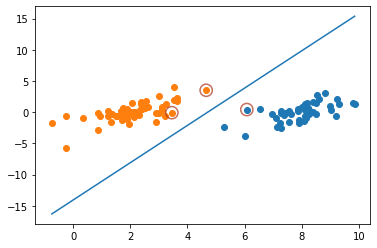

In [11]:
if '__main__' == __name__:
    # 加载训练数据
    dataset, labels = load_data('testSet.txt')
    # 使用简化版SMO算法优化SVM
    alphas, b = simple_smo(dataset, labels, 0.6, 40)
    # 分类数据点
    classified_pts = {'+1': [], '-1': []}
    for point, label in zip(dataset, labels):
        if label == 1.0:
            classified_pts['+1'].append(point)
        else:
            classified_pts['-1'].append(point)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # 绘制数据点
    for label, pts in classified_pts.items():
        pts = np.array(pts)
        ax.scatter(pts[:, 0], pts[:, 1], label=label)
    # 绘制分割线
    w = get_w(alphas, dataset, labels)
    x1, _ = max(dataset, key=lambda x: x[0])
    x2, _ = min(dataset, key=lambda x: x[0])
    a1, a2 = w
    y1, y2 = (-b - a1*x1)/a2, (-b - a1*x2)/a2
    ax.plot([x1, x2], [y1, y2])
    # 绘制支持向量
    for i, alpha in enumerate(alphas):
        if abs(alpha) > 1e-3:
            x, y = dataset[i]
            ax.scatter([x], [y], s=150, c='none', alpha=0.7,
                       linewidth=1.5, edgecolor='#AB3319')
    plt.show()